In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("/content/StudentPerformanceFactors.csv")
data.head(30)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
5,19,88,Medium,Medium,Yes,8,89,Medium,Yes,3,Medium,Medium,Public,Positive,3,No,Postgraduate,Near,Male,71
6,29,84,Medium,Low,Yes,7,68,Low,Yes,1,Low,Medium,Private,Neutral,2,No,High School,Moderate,Male,67
7,25,78,Low,High,Yes,6,50,Medium,Yes,1,High,High,Public,Negative,2,No,High School,Far,Male,66
8,17,94,Medium,High,No,6,80,High,Yes,0,Medium,Low,Private,Neutral,1,No,College,Near,Male,69
9,23,98,Medium,Medium,Yes,8,71,Medium,Yes,0,High,High,Public,Positive,5,No,High School,Moderate,Male,72


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [4]:
data.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


**Data Preprocessing**

In [5]:
data.count().isnull()

,0
Hours_Studied,False
Attendance,False
Parental_Involvement,False
Access_to_Resources,False
Extracurricular_Activities,False
Sleep_Hours,False
Previous_Scores,False
Motivation_Level,False
Internet_Access,False
Tutoring_Sessions,False


In [6]:
data.duplicated().any()

np.False_

In [7]:
data.duplicated().sum()

np.int64(0)

Conclusion: dataset is well prepared and cleaned

**Outliers**

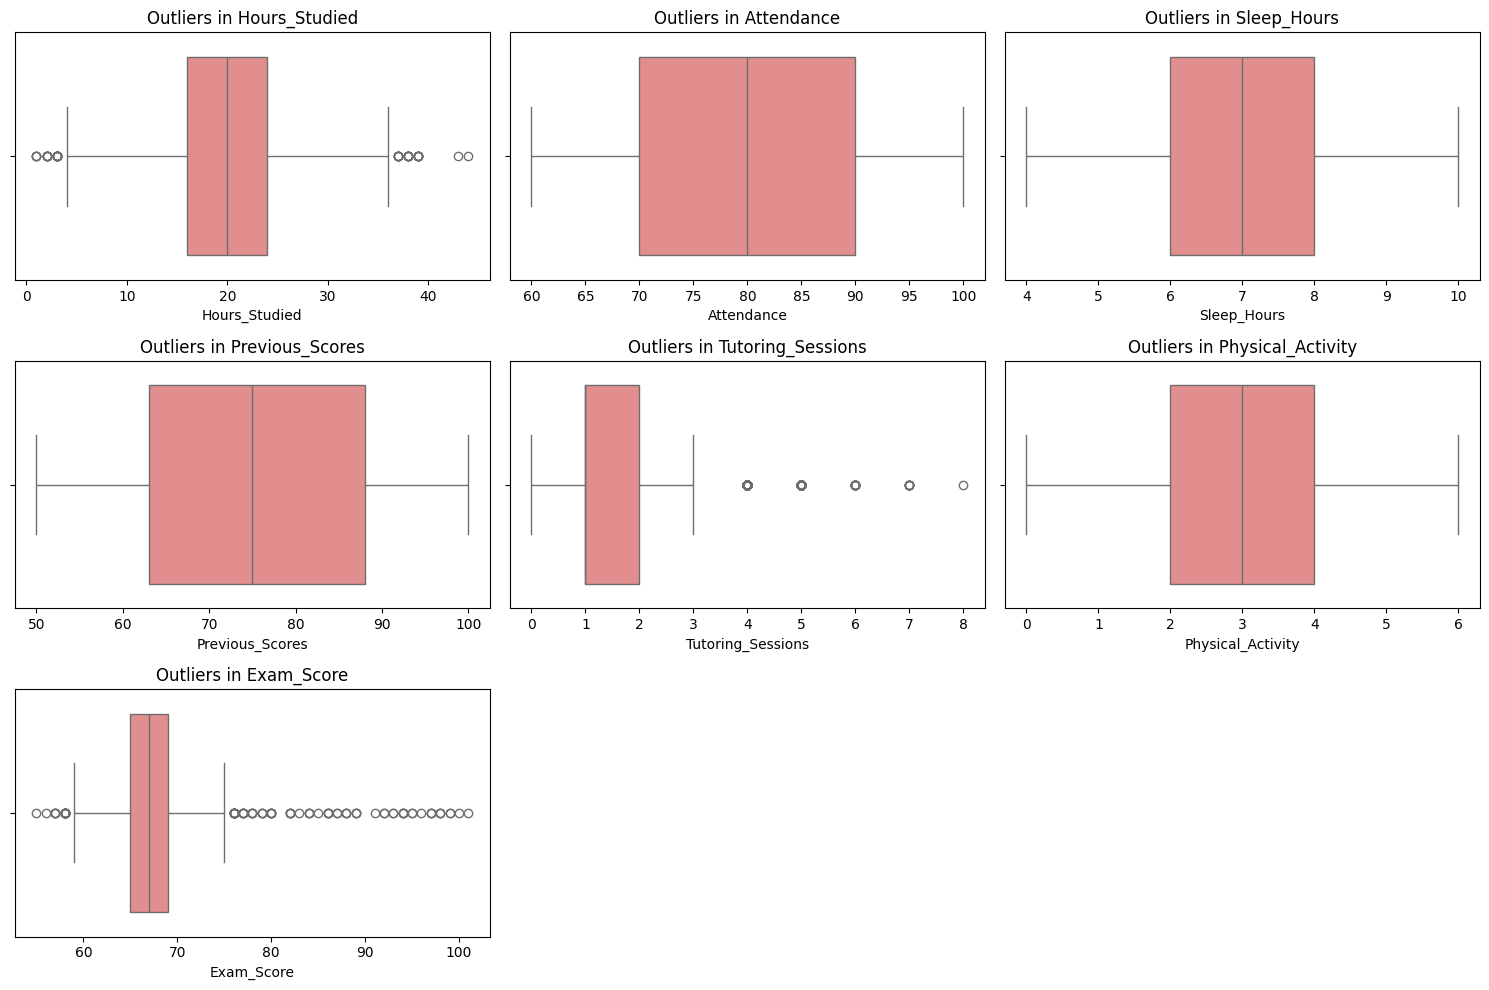

In [8]:
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(15, 10))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=data[col], color='lightcoral')
    plt.title(f'Outliers in {col}')

plt.tight_layout()
plt.show()

👆🏻Comment: the dataset shows clear outliers in Exam_Score, Tutoring_Sessions, and Hours_Studied.



**Exam_Score:** a few students scored above the upper range and 100 or significantly below the lower range, which may be due to data entry errors or exceptional cases.

**Tutoring_Sessions:** some students attended an unusually high number of sessions compared to the majority.

**Hours_Studied:** some students reported extremely high study hours.

-----------------------------------------

**Data Visualization**

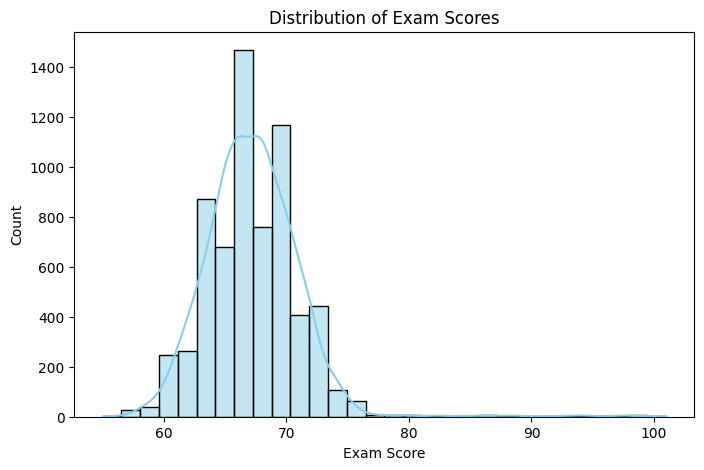

In [9]:
plt.figure(figsize=(8,5))
sns.histplot(data['Exam_Score'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Exam Scores')
plt.xlabel('Exam Score')
plt.ylabel('Count')
plt.show()

👆🏻Comment: most scores are clustered between 65–70.

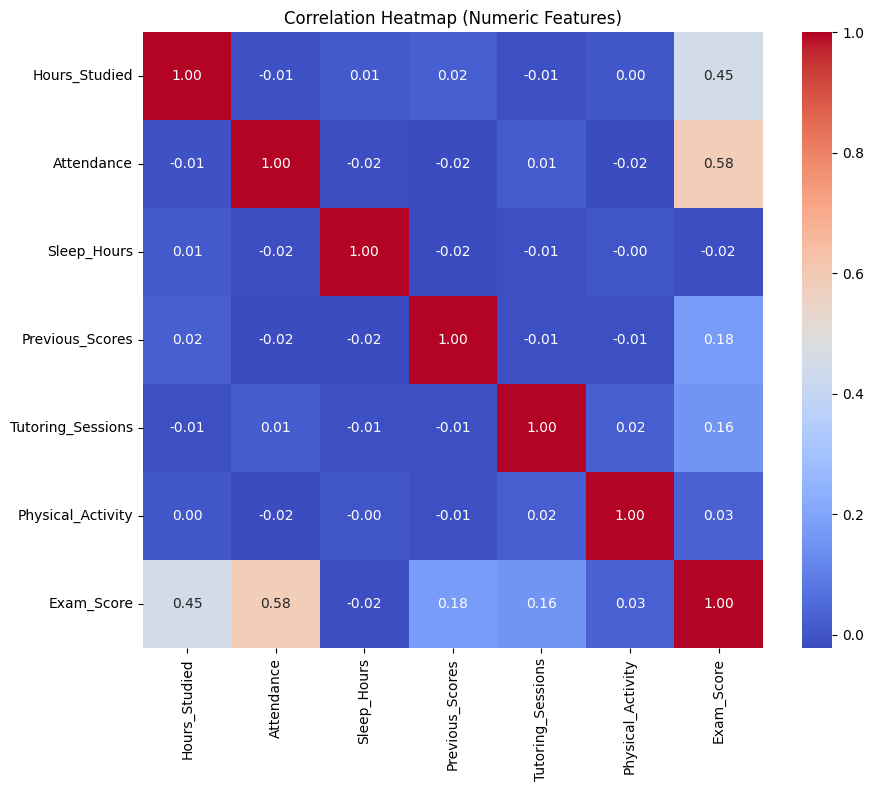

In [10]:
plt.figure(figsize=(10,8))
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns
sns.heatmap(data[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (Numeric Features)')
plt.show()

👆🏻Comment: Hours_Studied, Attendance, and Previous_Scores show a positive correlation with Exam_Score.

/tmp/ipython-input-2323130146.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Gender', palette='pastel')


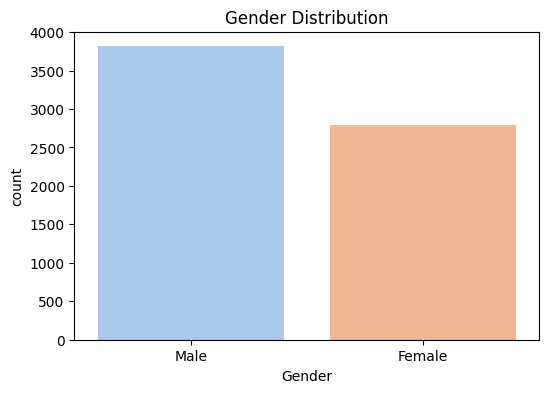

In [11]:
plt.figure(figsize=(6,4))
sns.countplot(data=data, x='Gender', palette='pastel')
plt.title('Gender Distribution')
plt.show()

👆🏻Comment: slightly more males than females in the dataset.

/tmp/ipython-input-3417814450.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x='Parental_Involvement', y='Exam_Score', ci=None, palette='muted')
/tmp/ipython-input-3417814450.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='Parental_Involvement', y='Exam_Score', ci=None, palette='muted')


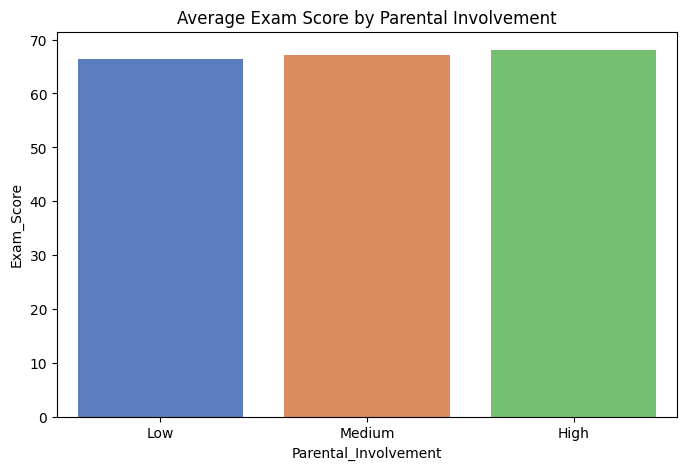

In [12]:
plt.figure(figsize=(8,5))
sns.barplot(data=data, x='Parental_Involvement', y='Exam_Score', ci=None, palette='muted')
plt.title('Average Exam Score by Parental Involvement')
plt.show()

👆🏻Comment: higher Parental_Involvement is associated with better Exam_Score.

/tmp/ipython-input-1757824672.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=attendance_summary, x='School_Type', y='Number_of_Students', palette='pastel')


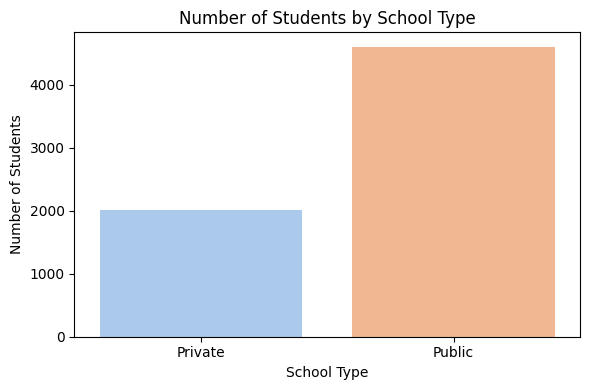

In [37]:
attendance_summary = data.groupby('School_Type')['Attendance'].count().reset_index()
attendance_summary.rename(columns={'Attendance': 'Number_of_Students'}, inplace=True)


plt.figure(figsize=(6, 4))
sns.barplot(data=attendance_summary, x='School_Type', y='Number_of_Students', palette='pastel')
plt.title('Number of Students by School Type')
plt.ylabel('Number of Students')
plt.xlabel('School Type')
plt.tight_layout()
plt.show()

👆🏻Comment: We can see that more students attended private schools than public schools.

-----------------------------------------------

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [15]:
df_encoded = pd.get_dummies(data, drop_first=True)

In [16]:
X = df_encoded.drop('Exam_Score', axis=1)
y = df_encoded['Exam_Score']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [19]:
y_pred = model.predict(X_test)

In [20]:
rmse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R² Score: {r2:.2f}")

RMSE: 3.26
MAE: 0.45
R² Score: 0.77


In [21]:
accuracy = r2_score(y_test, y_pred) * 100
print(f" accuracy score : {accuracy:.2f}%")

 accuracy score : 76.96%


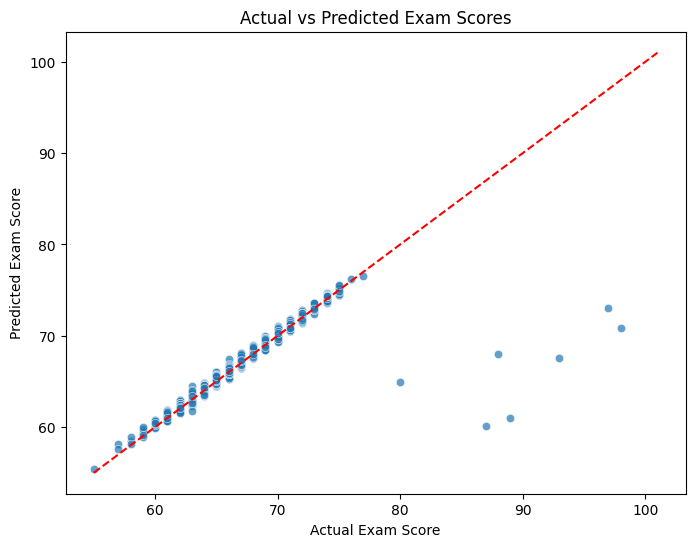

In [22]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.xlabel("Actual Exam Score")
plt.ylabel("Predicted Exam Score")
plt.title("Actual vs Predicted Exam Scores")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.show()

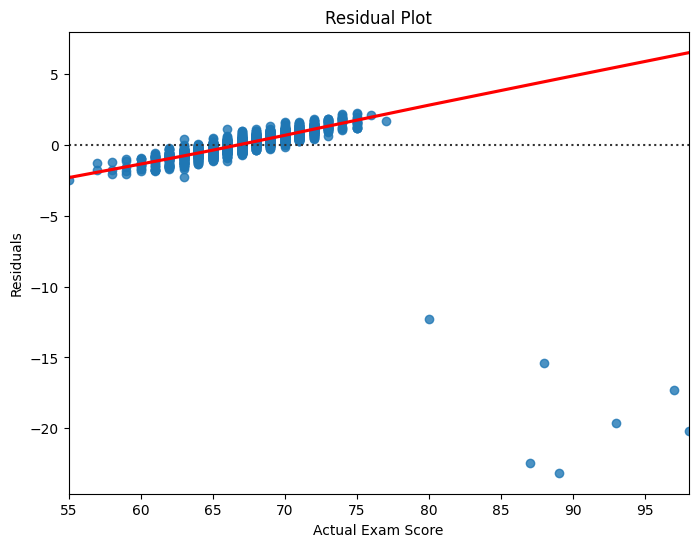

In [23]:
plt.figure(figsize=(8,6))
sns.residplot(x=y_test, y=y_pred, lowess=True, line_kws={'color': 'red'})
plt.xlabel("Actual Exam Score")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

The model was able to predict exam scores with about 76.7% accuracy. This means it captures most of the important patterns in the data, but it still misses some details, especially for unusual or extreme cases. In another words, it’s doing a decent job, but we can make it better, possibly by adding more relevant features or trying a more advanced model.

**BONUS PART**

In [24]:
from sklearn.preprocessing import PolynomialFeatures

In [25]:
df = pd.read_csv("StudentPerformanceFactors.csv")

In [26]:
X = df[['Hours_Studied', 'Attendance', 'Tutoring_Sessions']]
y = df['Exam_Score']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [29]:
lin2 = LinearRegression()
lin2.fit(X_train_poly, y_train)

LinearRegression()

In [30]:
y_pred_poly = lin2.predict(X_test_poly)

In [31]:
r2_poly = r2_score(y_test, y_pred_poly)
print(f"Polynomial Regression R² Score: {r2_poly:.2f}")

Polynomial Regression R² Score: 0.61


In [32]:
accuracy = r2_poly * 100
print(f" accuracy score: {accuracy:.2f}%")

 accuracy score: 60.77%


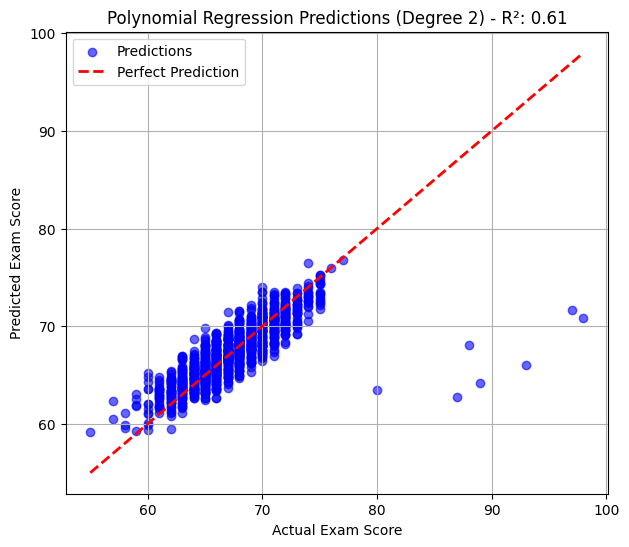

In [33]:
plt.figure(figsize=(7, 6))
plt.scatter(y_test, y_pred_poly, alpha=0.6, color='blue', label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         'r--', lw=2, label='Perfect Prediction')
plt.xlabel("Actual Exam Score")
plt.ylabel("Predicted Exam Score")
plt.title(f"Polynomial Regression Predictions (Degree 2) - R²: {r2_poly:.2f}")
plt.legend()
plt.grid(True)
plt.show()


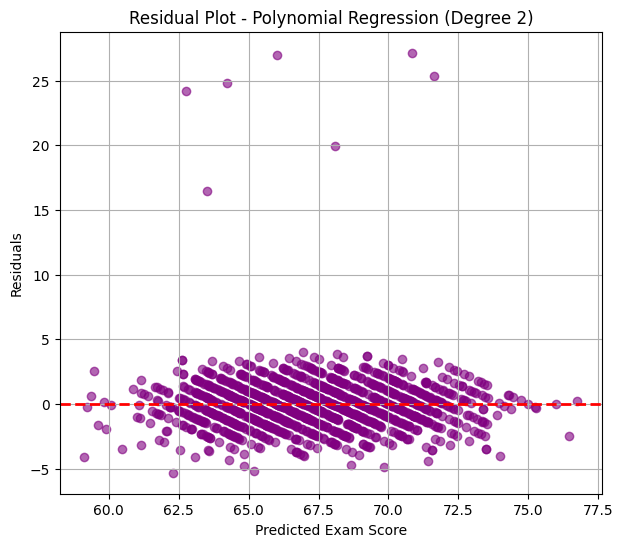

In [34]:
residuals_poly = y_test - y_pred_poly
plt.figure(figsize=(7, 6))
plt.scatter(y_pred_poly, residuals_poly, alpha=0.6, color='purple')
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.xlabel("Predicted Exam Score")
plt.ylabel("Residuals")
plt.title("Residual Plot - Polynomial Regression (Degree 2)")
plt.grid(True)
plt.show()

In conclusion, we can see that the linear regression model performed better than the polynomial model, achieving an accuracy of around 76%, compared to the polynomial model’s 60%. This suggests that the relationship between the features and the target variable is closer to linear rather than highly curved or complex. The polynomial model may have overfitted to patterns that don’t generalize well to the test data, leading to reduced performance. Therefore, for this dataset, a simpler model provides better predictive capability and interpretability.